<a href="https://colab.research.google.com/github/nepslor/teaching/blob/main/TimeSeriesForecasting/TS_visualization_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis and modeling - R
In this lesson we will go through an example of exploratory analyisis and time series modeling with python. We will usa a dataset containing power measurements and meteorological forecasts relative to a set of 24 power meters located in Rolle (Switzerland). 

<img src="https://raw.githubusercontent.com/nepslor/teaching/main/TimeSeriesForecasting/figs/REeL_Demo_grid.png" width="500"/>

The power measurements include mean active and reactive power, voltage magnitude and maximum total harmonic distortion (THD) for each phase, voltage frequency $\omega$ and the average power over the three phases, $P_{mean}$.
The meteorological forecasts include the temperature, global
horizontal and normal irradiance (GHI and GNI, respectively),
the relative humidity (RH) pressure and wind speed and
direction (Ws and Wdir, respectively).
<img src="https://raw.githubusercontent.com/nepslor/teaching/main/TimeSeriesForecasting/figs/REeL_data.png" width="500"/>

We start importing and installing required packages, and reading the data [stored on Zenodo](https://zenodo.org/record/3463137#.Y_COj9LMKV4)

In [ ]:
install.packages(c("reticulate", "box"))
box::use(reticulate)
pd <- reticulate::import("pandas")
pickle_data <- pd$read_pickle("https://zenodo.org/record/4549296/files/reduced_dataset.pk?download=1")

Convert date into POSIXct format and add hour and weekday colums

In [ ]:
library(tidyverse)
data <- pickle_data %>%
  mutate(date = as.POSIXct(row.names(pickle_data))) %>%
  mutate(hour = lubridate::hour(date), weekday = weekdays(as.Date(date))) %>%
  as_tibble()

# visualize first rows
head(data, 2)


0307a3cec15787560b7d0ba094f74d1decb2fa72,0f415416ff153479d65f54df3fa9974af46e3a89,1caab5f0e80231e1c6fdefc00edec4fdb6a02c5f,27fbb11689277a30f5db9c71b42e1d3826bd34ff,2ce3e7e1a5365dc54c7f4fc6284f0052397702b9,2d837275047e5fdce39fda42b541dbf6c858a4d1,350c6b9720ebb1e1a04e8f88ad0fa114c2af77b3,39f06481738604cb5916dce15639e380514b99ca,432650b919537d23cb4054fdb85a07eecaa4524c,49228b90116c6075fabcd8a1cf0e48e016373614,⋯,S2,S11,S12,S21,S22,ghi_backwards,temperature,date,hour,weekday
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>,<dttm>,<int>,<chr>
9.786,20.51800,10.653333,19.19033,23.08833,41.71200,24.27800,12.34933,28.30033,11.30700,⋯,335.4437,124.948,121.3660,167.8907,167.5530,"0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 1.0361273, 38.7799426, 156.4478764, 260.3510930, 344.1319121, 369.9701816, 346.8377059, 269.6279889, 128.3241184, 33.4936888, 0.4536259, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000","3.628846, 3.589157, 3.487837, 3.405724, 3.104913, 2.635390, 2.412121, 2.790470, 3.643543, 4.491212, 5.136085, 5.713502, 6.041380, 6.040144, 5.295770, 4.332725, 3.355077, 2.628606, 1.918602, 1.667037, 1.871196, 1.628147, 1.274511, 1.079066",2018-01-13 00:10:00,0,Saturday
11.190,20.08633,9.367333,19.79400,22.37467,43.57267,23.85333,10.23067,30.27533,13.22533,⋯,330.7110,126.385,123.8003,165.3543,165.3567,"0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 3.9360518, 55.2217493, 174.3463188, 278.0515715, 352.2518698, 368.1014701, 338.3484025, 247.0980369, 108.1575678, 23.6046182, 0.2917522, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000","3.625641, 3.573337, 3.477822, 3.371051, 3.025677, 2.567965, 2.445455, 2.910311, 3.793443, 4.605749, 5.243122, 5.799428, 6.051145, 5.960238, 5.148290, 4.157464, 3.230352, 2.488140, 1.838255, 1.709630, 1.847381, 1.563547, 1.246252, 1.013848",2018-01-13 00:20:00,0,Saturday


0307a3cec15787560b7d0ba094f74d1decb2fa72,0f415416ff153479d65f54df3fa9974af46e3a89,1caab5f0e80231e1c6fdefc00edec4fdb6a02c5f,27fbb11689277a30f5db9c71b42e1d3826bd34ff,2ce3e7e1a5365dc54c7f4fc6284f0052397702b9,2d837275047e5fdce39fda42b541dbf6c858a4d1,350c6b9720ebb1e1a04e8f88ad0fa114c2af77b3,39f06481738604cb5916dce15639e380514b99ca,432650b919537d23cb4054fdb85a07eecaa4524c,49228b90116c6075fabcd8a1cf0e48e016373614,⋯,a4656735af4aa0ba2e4758f8d4f6e411cfc55097,a52f9650e9aa3d60e43792eb2574e0e76bb00aaf,b3e1bf5d8d0337b42f972ca11beafea062bd99be,c41c064e0aa78571b028c8673ebe7abd59d0e6d8,c55a669913fe883d9ec913821688656ea8e4c884,da3ac5e45e56e0e2263f39f38c033366f5d1e0c4,fe2245a4afe0afc24d215dd4abd2ffb34610dd27,date,hour,weekday
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>,<chr>
9.78600,20.51800,10.653333,19.19033,23.08833,41.71200,24.27800,12.349333,28.30033,11.30700,⋯,15.56800,39.93067,28.95800,54.73900,9.649000,16.35500,17.92133,2018-01-13 00:10:00,0,Saturday
11.19000,20.08633,9.367333,19.79400,22.37467,43.57267,23.85333,10.230667,30.27533,13.22533,⋯,14.85000,38.95167,31.95400,53.36033,8.920667,15.81067,16.35933,2018-01-13 00:20:00,0,Saturday
10.71233,19.97733,12.999333,19.60700,22.24900,39.30633,23.93867,10.445000,31.29967,11.96800,⋯,14.73567,40.08467,29.78333,55.75767,9.343667,14.56867,16.34467,2018-01-13 00:30:00,0,Saturday
12.44500,20.04967,11.751333,19.23333,22.75533,35.91633,24.07400,9.907000,29.98400,12.00367,⋯,15.35733,37.04767,28.65800,41.36633,9.045667,14.57567,24.53200,2018-01-13 00:40:00,0,Saturday
10.48700,19.22533,10.183667,20.22667,22.37533,36.36000,25.03967,10.479667,32.33300,11.68800,⋯,18.01800,37.37667,25.04767,29.71200,9.094000,15.08367,19.81933,2018-01-13 00:50:00,0,Saturday
10.84133,18.55600,9.208667,19.31333,22.58633,43.04467,24.94600,9.891333,34.41467,12.45467,⋯,18.07133,37.44200,25.54900,34.10800,8.832000,16.84967,15.73700,2018-01-13 01:00:00,1,Saturday


date,hour,weekday,name,power
<dttm>,<int>,<chr>,<chr>,<dbl>
2018-01-13 00:10:00,0,Saturday,0307a3cec15787560b7d0ba094f74d1decb2fa72,9.78600
2018-01-13 00:20:00,0,Saturday,0307a3cec15787560b7d0ba094f74d1decb2fa72,11.19000
2018-01-13 00:30:00,0,Saturday,0307a3cec15787560b7d0ba094f74d1decb2fa72,10.71233
2018-01-13 00:40:00,0,Saturday,0307a3cec15787560b7d0ba094f74d1decb2fa72,12.44500
2018-01-13 00:50:00,0,Saturday,0307a3cec15787560b7d0ba094f74d1decb2fa72,10.48700
2018-01-13 01:00:00,1,Saturday,0307a3cec15787560b7d0ba094f74d1decb2fa72,10.84133


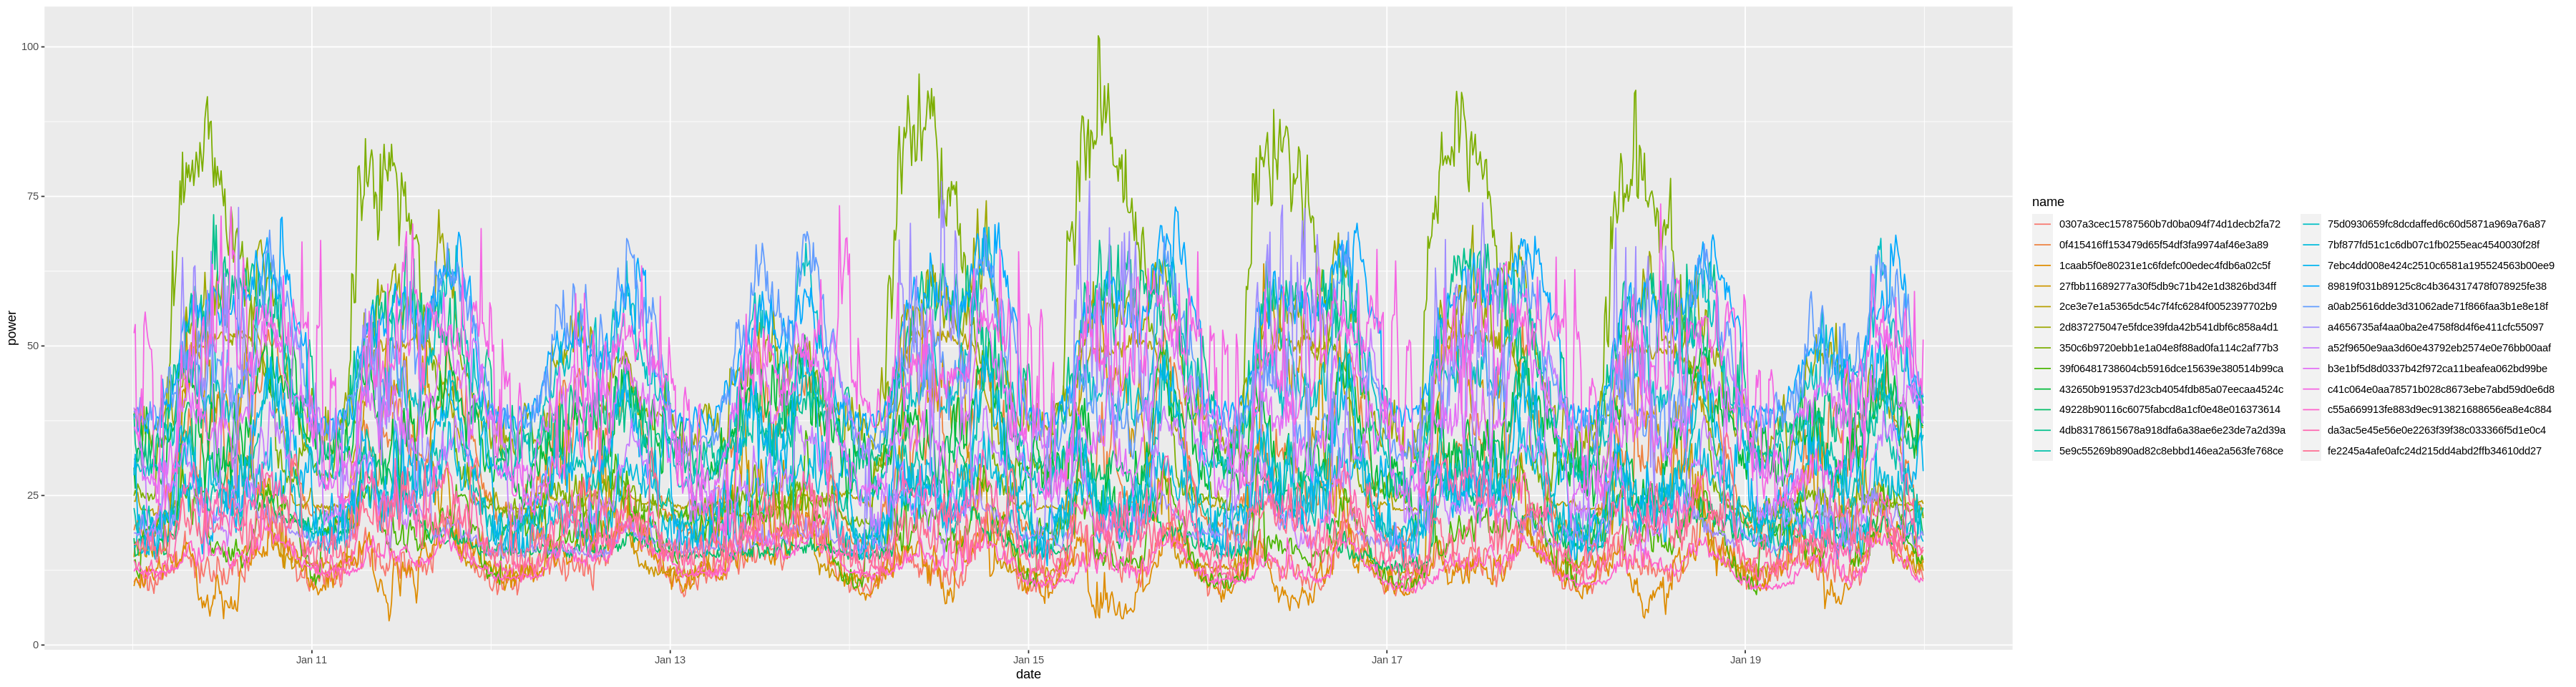

In [ ]:
# advanced select with regular expression: get only power time series
power_data <- select(data, matches("\\d{3}"), date, hour, weekday)
head(power_data)

# melt the dataframe and put it in "long" format
melted_data <- gather(power_data, key = "name", value = "power", -date, -hour, -weekday)
head(melted_data)

# plot all the time series based on their names
options(repr.plot.width = 30, repr.plot.height = 8)
ggplot(filter(melted_data, date>as.POSIXct('2019-01-10')), aes(date, power, color=name)) + 
geom_line()


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 9.500622 17.898915 22.995156 27.287088 36.977204 51.973599 

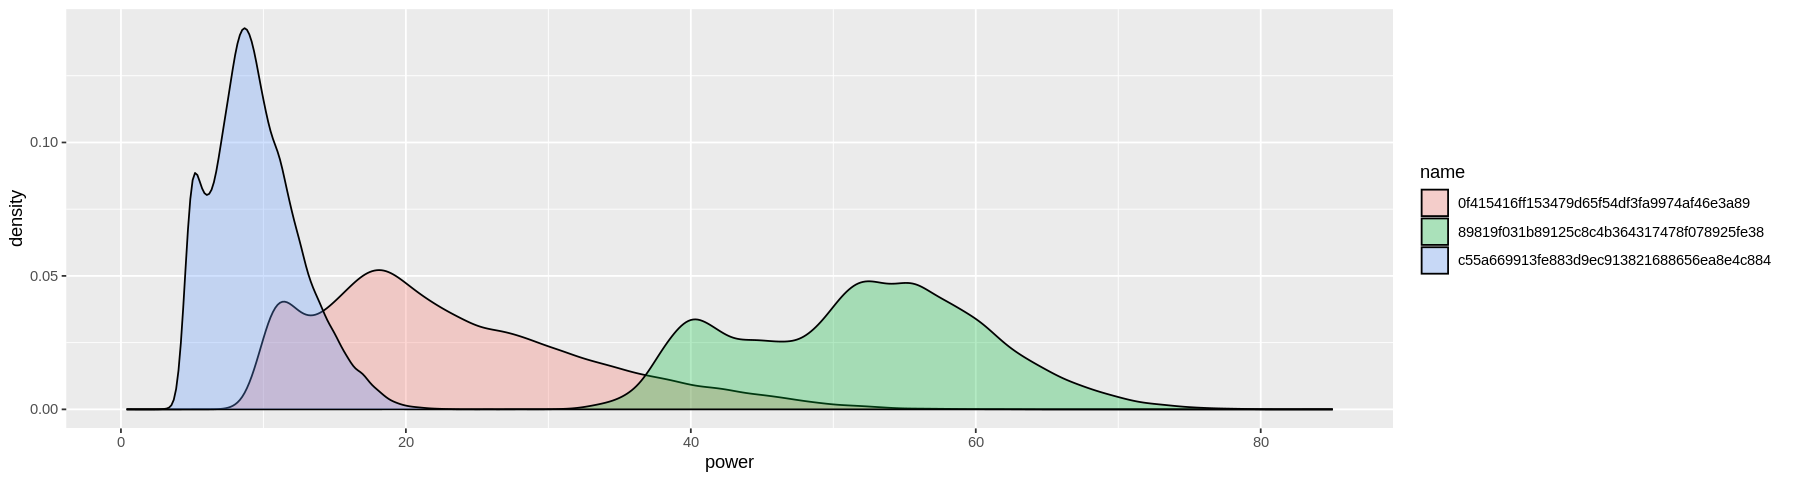

In [ ]:
only_power_data <- select(data, matches("\\d{3}"))
power_summary <- summary(colMeans(only_power_data), quantile.type=1)
head(power_summary)

is_extreme <- colMeans(only_power_data) %in% power_summary[c("Min.", "Median", 'Max.')]
extreme_power_data <- gather(select(power_data, colnames(only_power_data)[is_extreme], date, hour, weekday), key = "name", value = "power", -date, -hour, -weekday)

options(repr.plot.width = 15, repr.plot.height = 4)
ggplot(extreme_power_data, aes(power)) + 
geom_density(aes(fill=name), alpha=0.3)

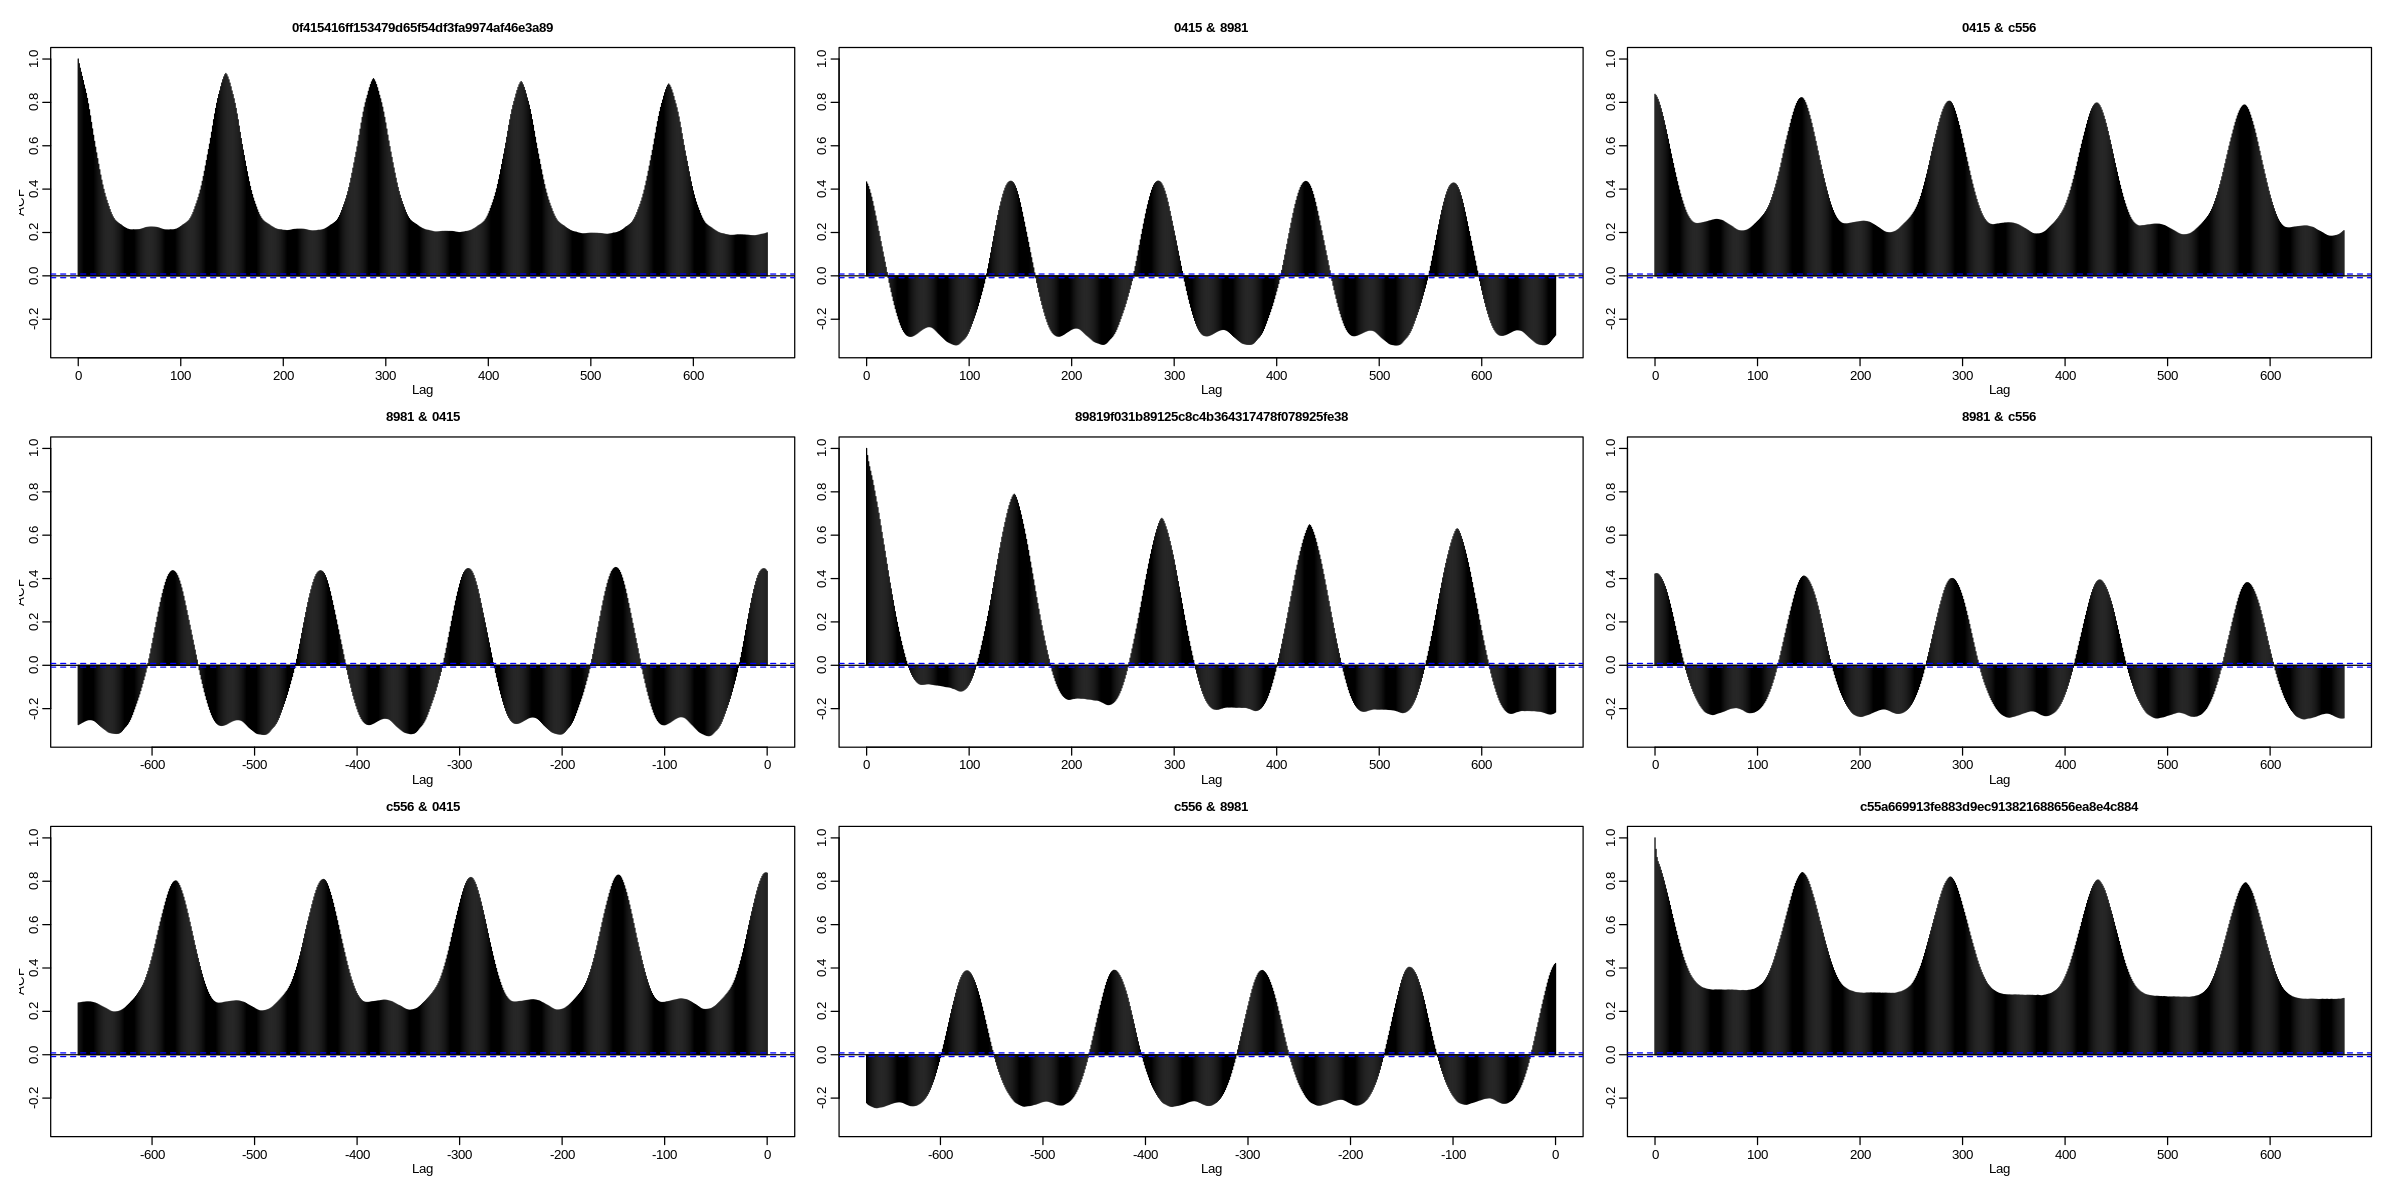

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)
acf(select(power_data, colnames(only_power_data)[is_extreme]), 96*7)

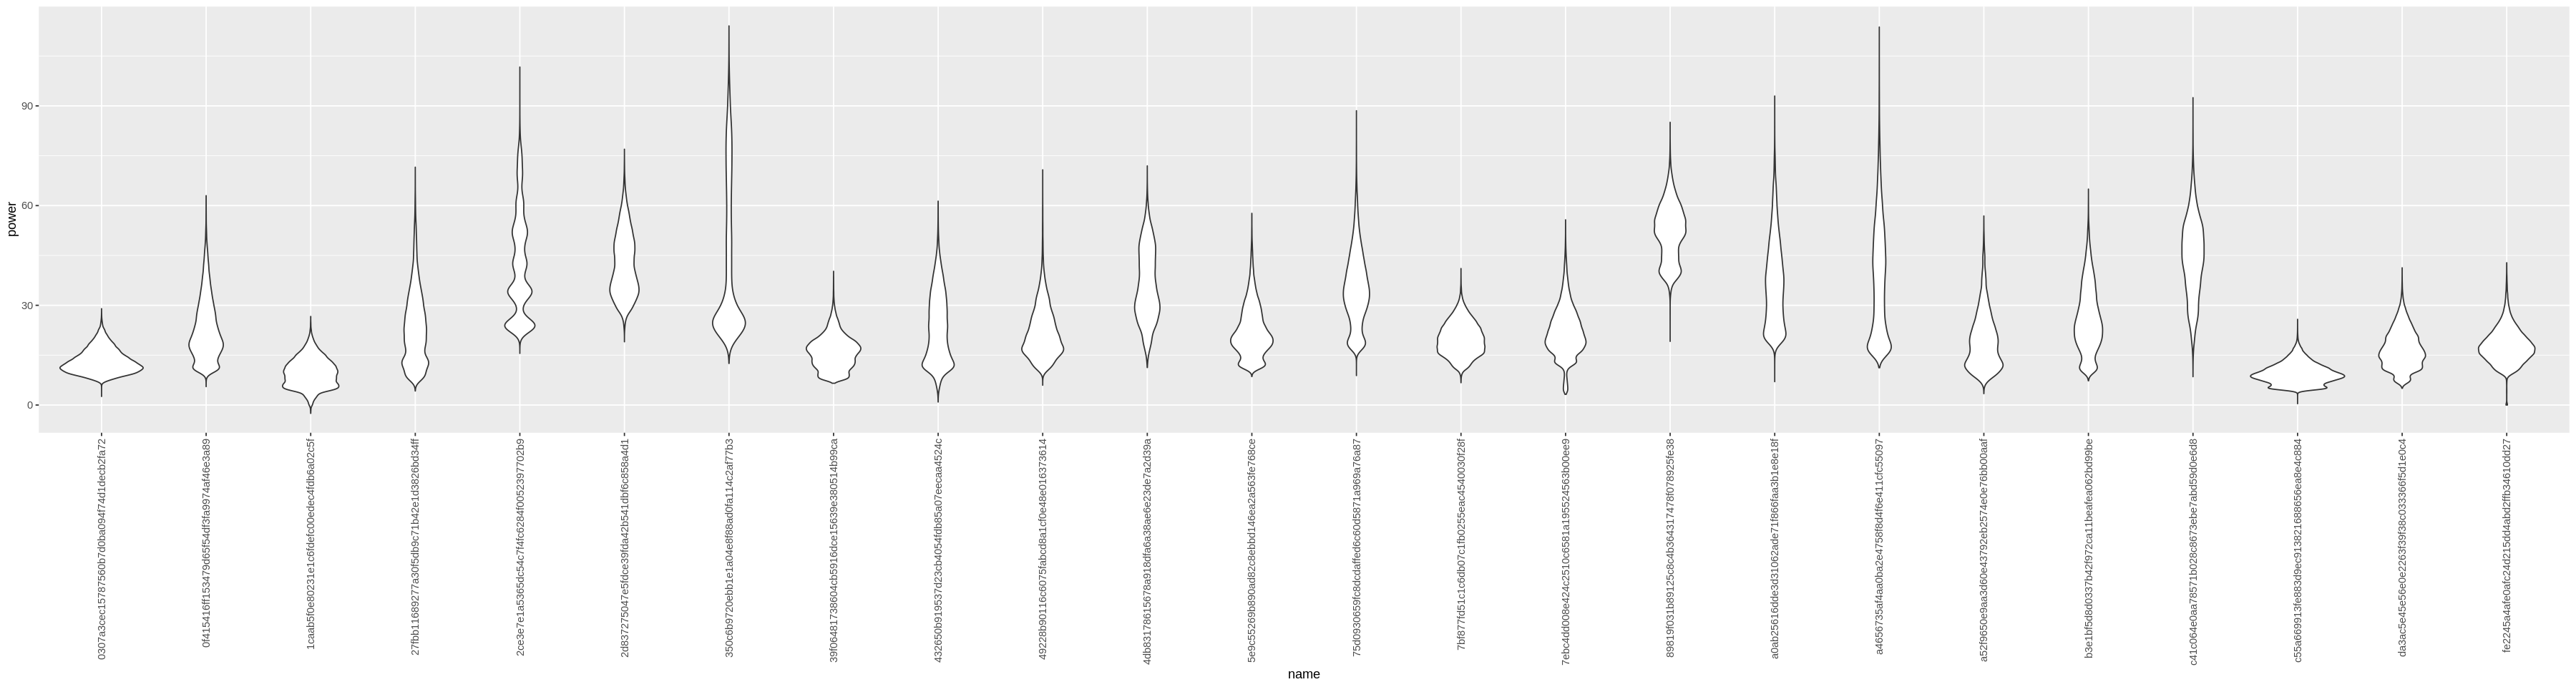

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 8)
ggplot(melted_data, aes(name, power)) + 
geom_violin() +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


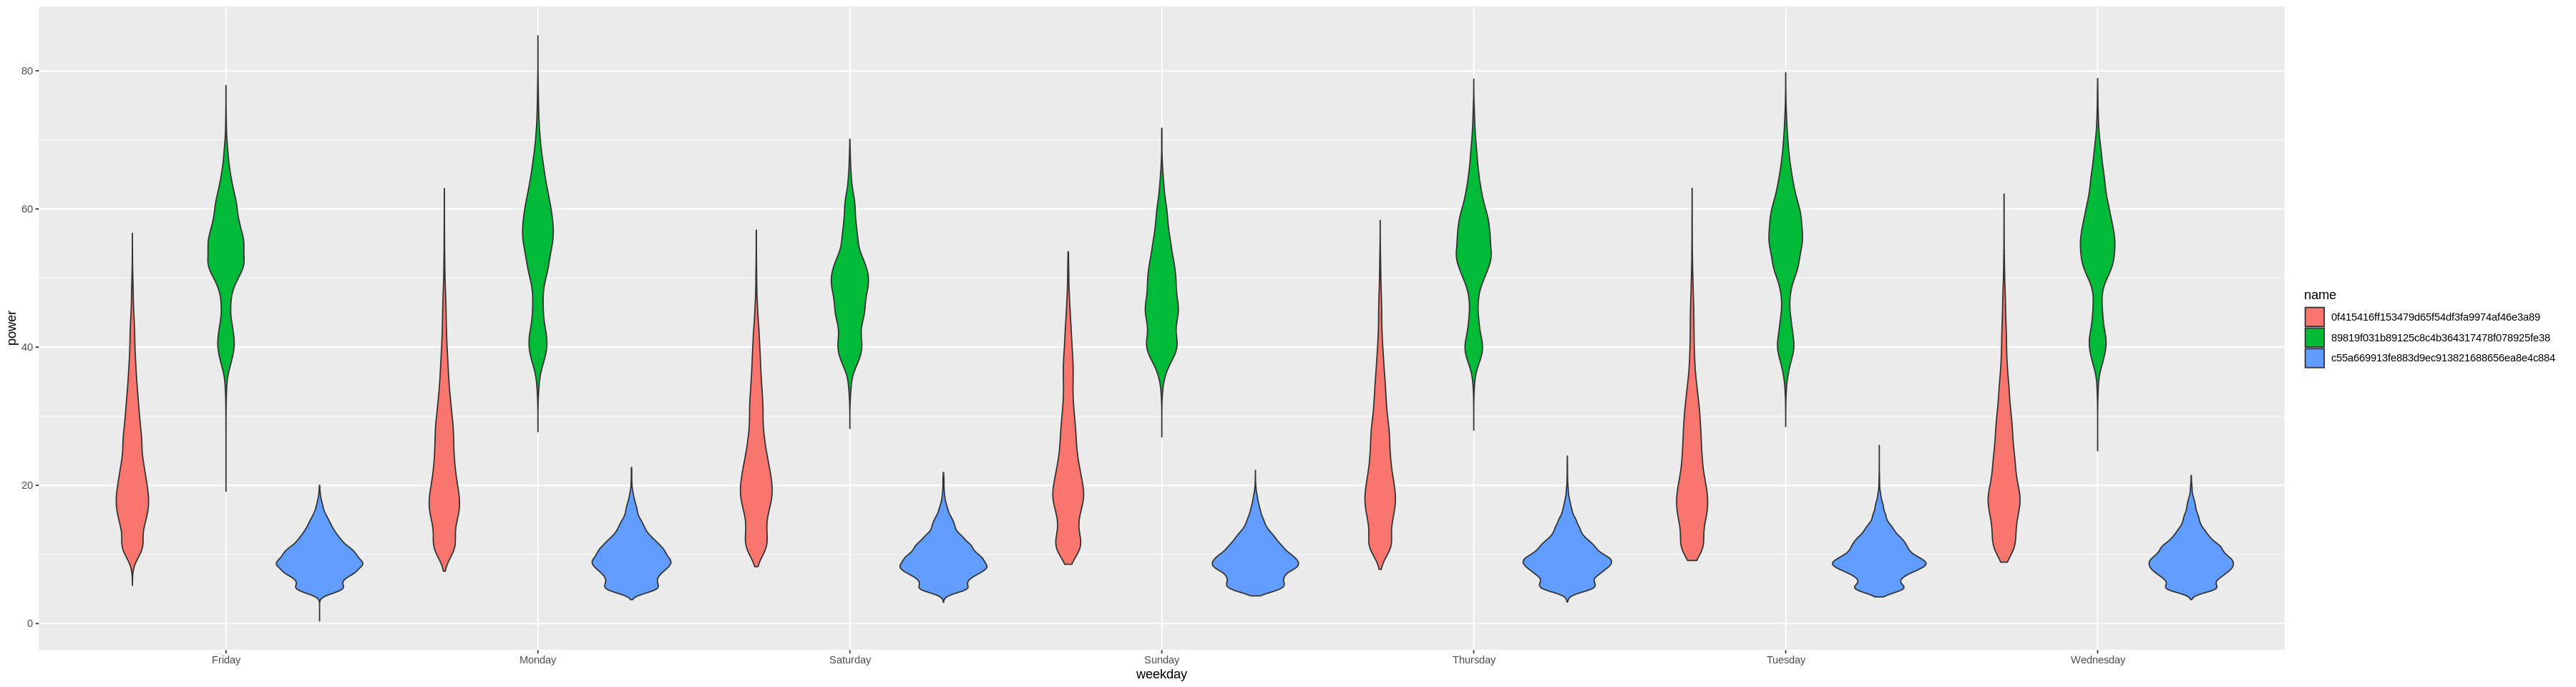

In [ ]:
ggplot(extreme_power_data, aes(weekday, power)) +
geom_violin(aes(fill=name))

Single time series seem to show a bimodal distributions for all weekday. We see if we can reduce the total variance filtering observations for dayhour

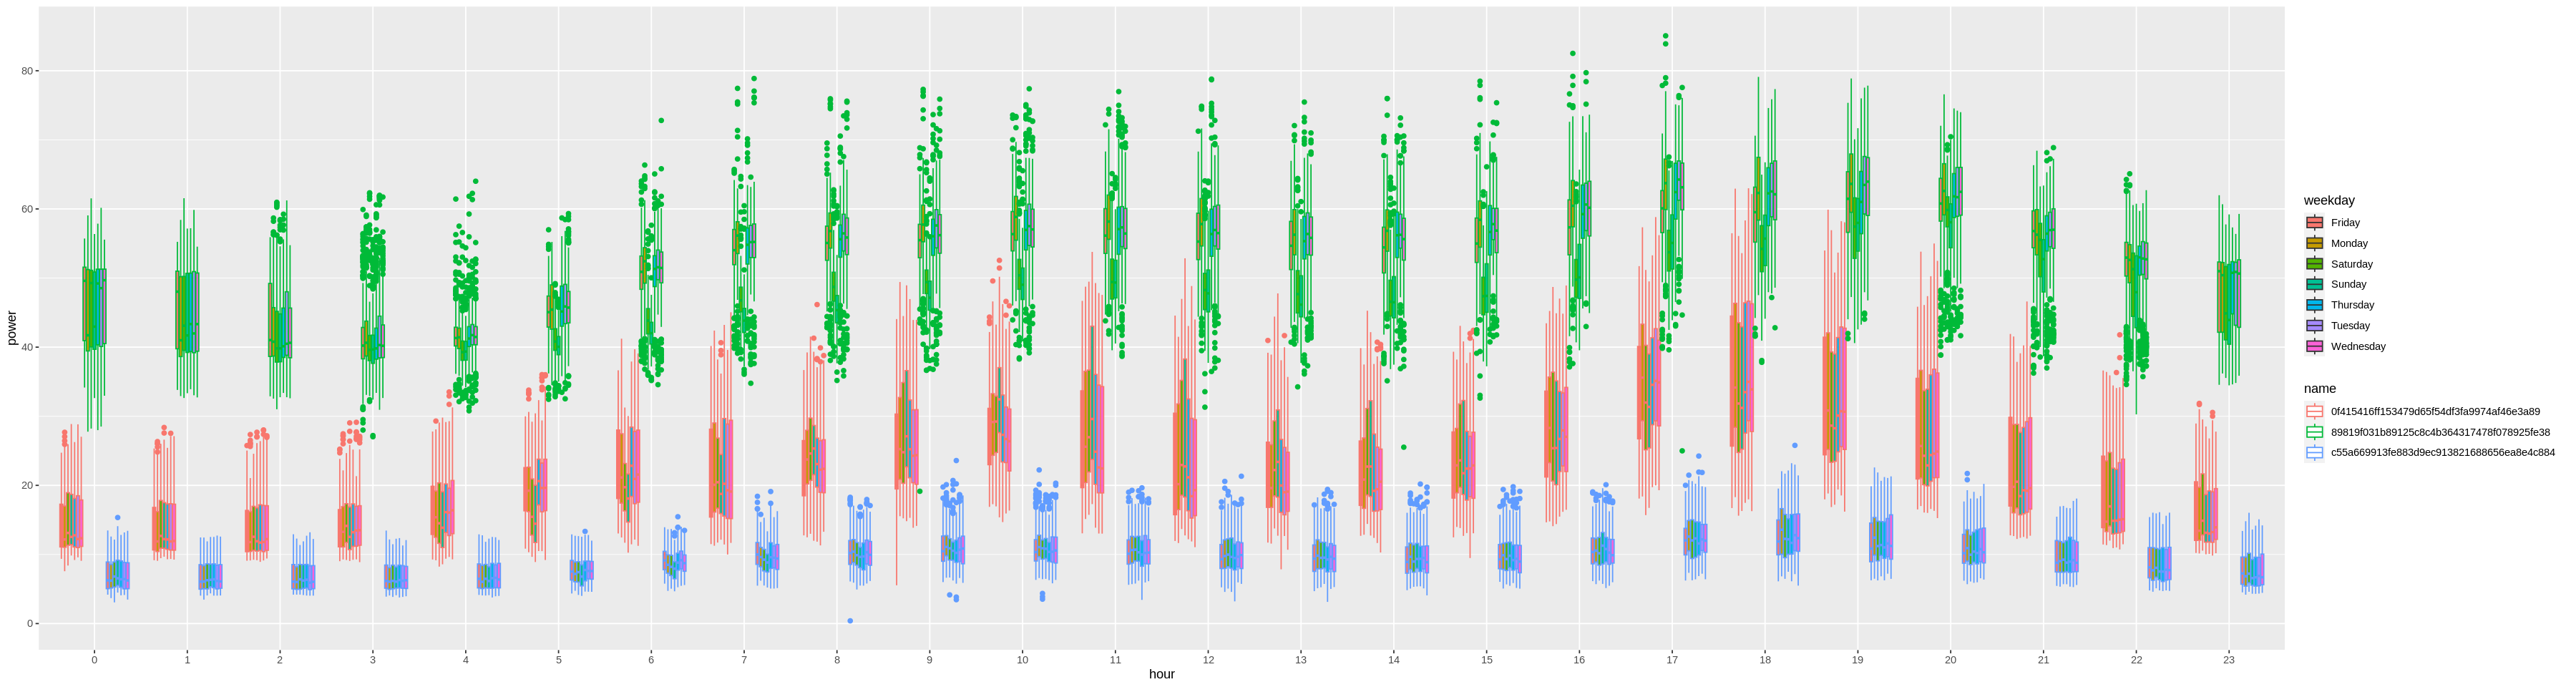

In [ ]:
extreme_power_data$hour <- as.factor(extreme_power_data$hour)
ggplot(extreme_power_data, aes(hour, power)) +
geom_boxplot(aes(color=name, fill=weekday))


Time series with higher means seems to have different day-hour distributions for different weekdays. We furher investigate this hypotesis on the aggregated power profile

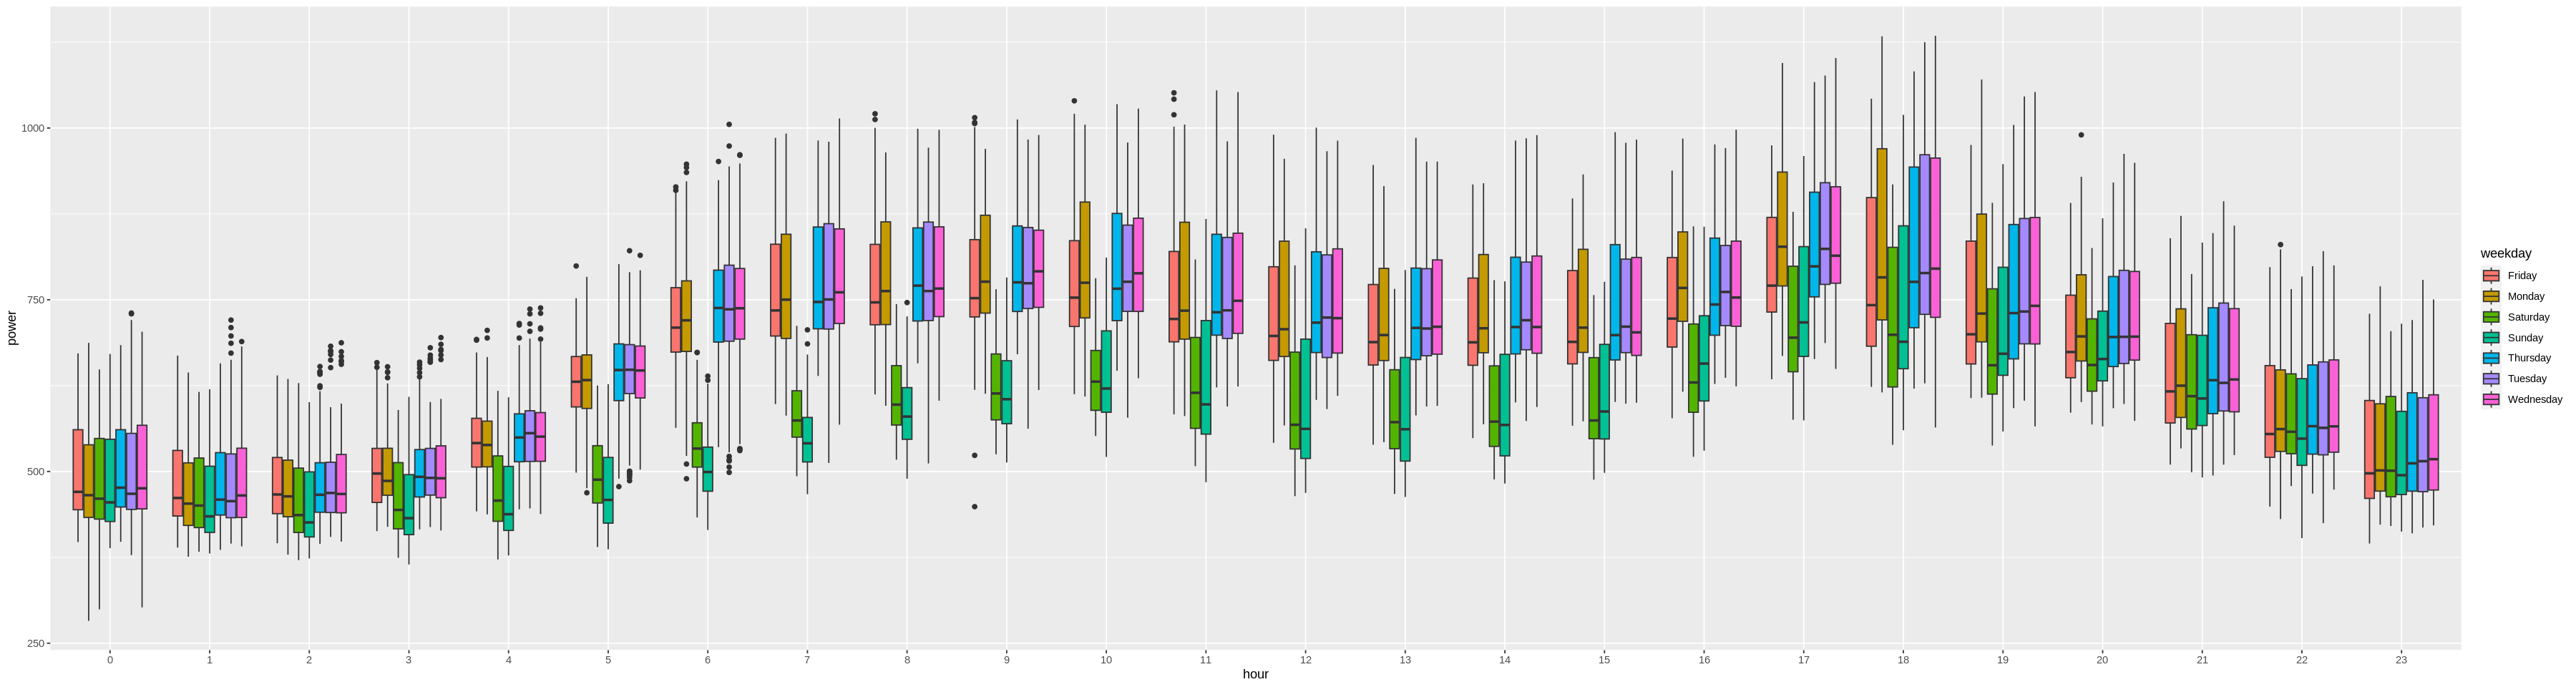

In [ ]:
top_power_data <- gather(select(data, all, date, hour, weekday), key = "name", value = "power", -date, -hour, -weekday)
top_power_data$hour <- as.factor(top_power_data$hour)
ggplot(top_power_data, aes(hour, power)) +
geom_boxplot(aes(fill=weekday))

We try to further reduce the observation variance subtracting the daily means to the power profiles. This visualize the uncertainty in the power profile if we know in advance just the mean day ahead power consumption 

In [ ]:
daily_power <- top_power_data %>%
  mutate(day = as.factor(lubridate::as_date(top_power_data$date, tz=NULL))) %>%
  group_by(day) %>%
  summarise(mean_daily=mean(power, na.rm = TRUE))

top_power_data <- top_power_data %>%
  mutate(power, day=as.factor(lubridate::as_date(top_power_data$date, tz=NULL)))

# subtract daily mean to the observations in top_power_data
#f = function(y) {daily_power$mean_daily[daily_power$day == y]}
#top_power_data_norm <- top_power_data %>%
#  mutate(daily_mean = mapply(f,top_power_data$day)) %>%
#  mutate(normalized_power = power-daily_mean)

top_power_data_norm <- left_join(top_power_data, daily_power, by="day")
top_power_data_norm <- top_power_data_norm %>% mutate(normalized_power = power-mean_daily)

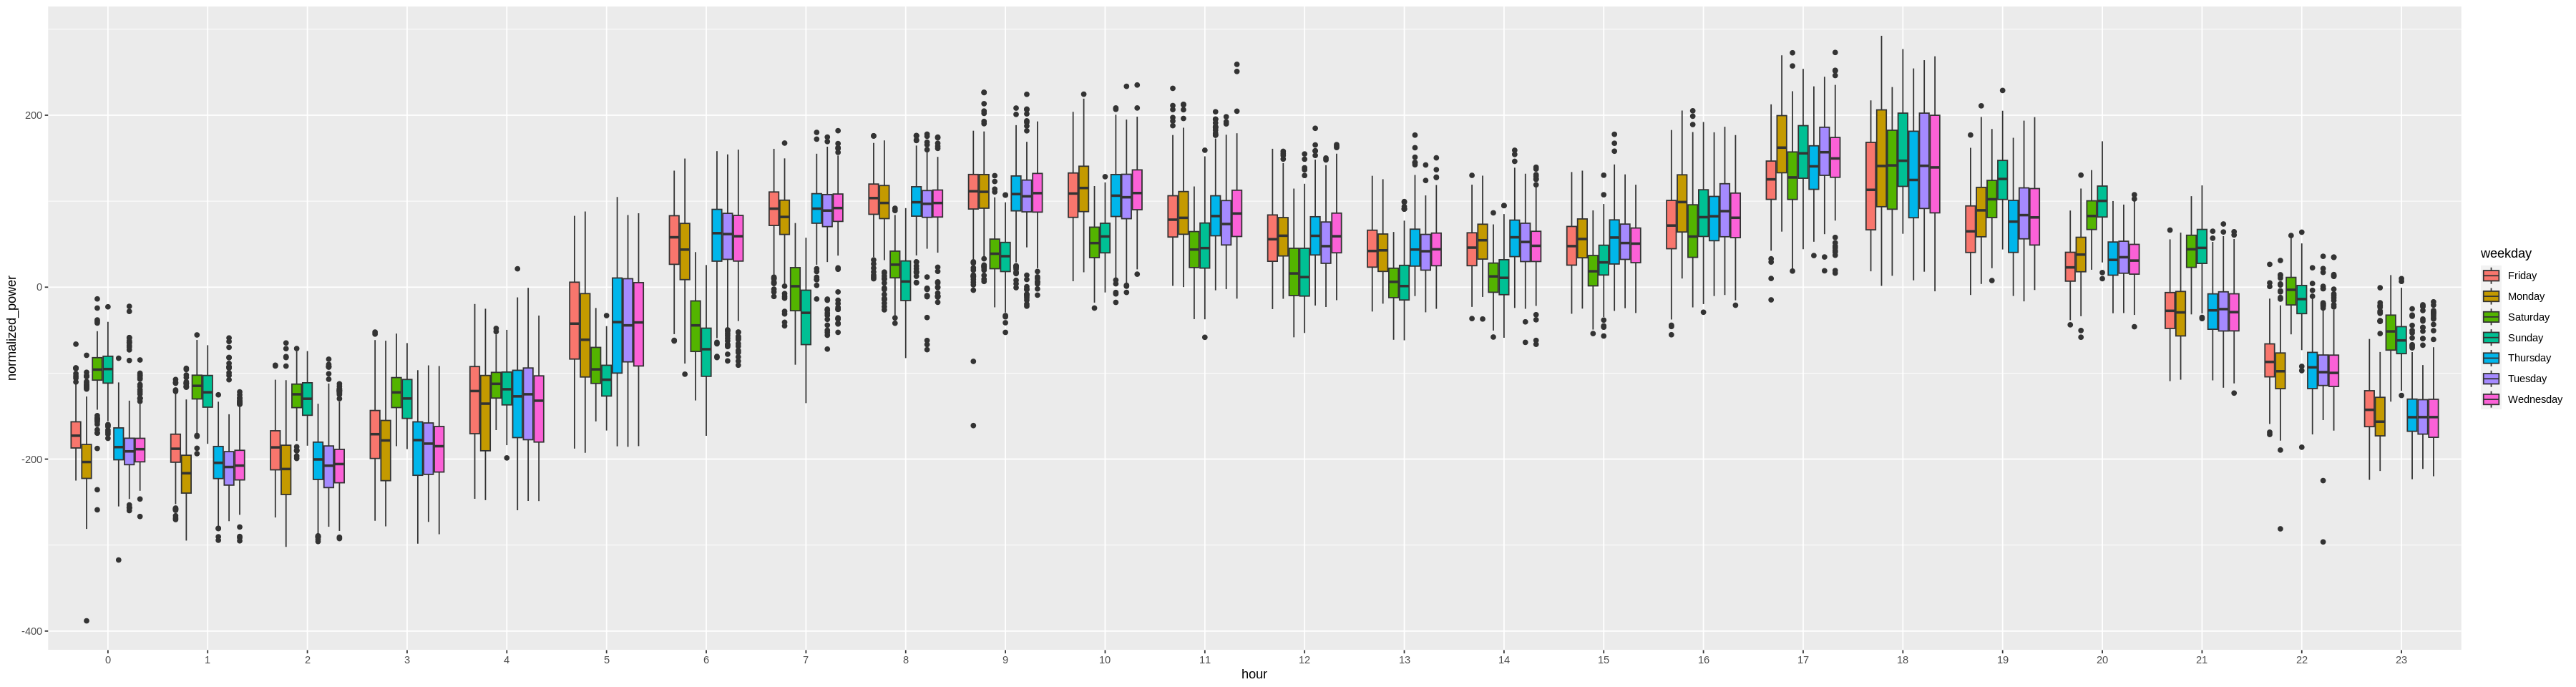

In [ ]:
ggplot(top_power_data_norm, aes(hour, normalized_power)) +
geom_boxplot(aes(fill=weekday))

##❓Your turn
* Among the bottom time series, find the most similar and most dissimilar couples
* Look at the most dissimilar couple. Try to scatter them against the values of the predicted GHI
* Can you spot other series for which the GHI has a similar effect?